# project overview

American Sign Language (ASL) uses hand signals, facial expressions and body language to convey meaning. ASL, the primary sign language used in North America, is a complete language with a defined syntax and grammar. The ASL manual alphabet, one part of this language system, utilizes the signer's dominant hand to represent all of the letters of the English language alphabet.

The ASL alphabet, unlike the British manual alphabet, for example, only uses one hand. While some letters, such as the signs for O or Z, directly mimic the written version, most signs do not mimic the written version. 

I'll make the first steps towards the developing an algorithms that could be used as part of mobile or web app to help deefing people to ease communicating with other people


# Datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
from glob import glob
from skimage.io import imread
# import tensorflow as tf
# import tensorflow 
import cv2
# from tensorflow import keras
from os.path import join
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from keras.utils.np_utils import to_categorical

the dataset American Sign Language (ASL) from kaggle you can find it [here](https://www.kaggle.com/grassknoted/asl-alphabet)
* the dataset is composed of 29 folders each folder contains 3000 images. I used subset of it ,I take 1000 image from each folder then in this case we will have 29000 image 
* each folder could be used as labels.we have 26 alphabet in english language (A to Z) and aditional labels(del ,space,del)

In [4]:
# data_dir='/home/workspace/dog-project/data/'
data_dir='C:/Users/hassan/Desktop/ALSproject/asl-alphabet/asl_alphabet_train/'
img_paths=[join(data_dir,floder+'/'+images) for floder in sorted(os.listdir(data_dir)) for x,images in enumerate(os.listdir(data_dir+floder)) if x < 1000 ]
print('we have ',len(img_paths),' images')

img_label=[floder for floder in sorted(os.listdir(data_dir)) for x,images in enumerate(os.listdir(data_dir+floder)) if x<1000 ]
# print(len(img_label))

data_df=pd.DataFrame({'Path':img_paths,'label':img_label})
data_df['lebelN']=data_df['label'].map(({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                                         'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21
                                         ,'W':22,'X':23,'Y':24,'Z':25,'del':26,'nothing':27,'space':28}))
# print(data_df['Path'][5000])
# print(data_df['label'][5000])
# print(data_df['Path'][8])

alphabet=[alph for alph in sorted(os.listdir(data_dir))]
print('we have ',len(alphabet),' labels')
print('our labels are ...',alphabet)



we have  29000  images
we have  29  labels
our labels are ... ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


# Data Exploration

In [6]:
data_df.head(10)

,Path,label,lebelN
0,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,A,0
1,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,A,0
2,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,A,0
3,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,A,0
4,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,A,0
5,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,A,0
6,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,A,0
7,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,A,0
8,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,A,0
9,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,A,0


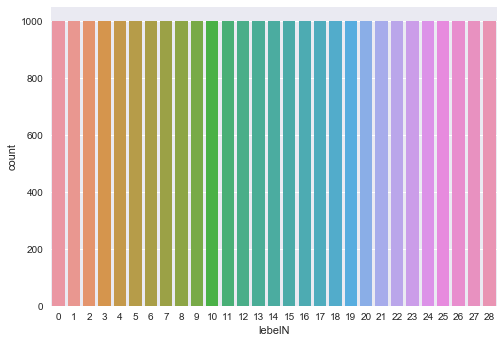

In [8]:
# map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}
# dict_characters=map_characters

import seaborn as sns
lab = data_df["lebelN"]
dist = lab.value_counts()
sns.countplot(lab)
# %matplotlib inline
plt.show()
# print(dict_characters)

in the next cell I did shuffling for the data because I read it from the floder sequentially,Then spelt the data to 
* train data which contains 20000 image paths
* test data which contains 5000 image paths
* valid data which coontains 4000 image paths

In [9]:
from sklearn.utils import shuffle

data_df=shuffle(data_df,random_state=1).reset_index(drop=True)


train_targets=data_df[:20000]['Path'].values
train_labels=data_df[:20000]['lebelN'].values
train_labelsHot=to_categorical(train_labels,num_classes=29)


test_targets=data_df[20000:25000]['Path'].values
test_labels=data_df[20000:25000]['lebelN'].values
test_labelsHot=to_categorical(test_labels,num_classes=29)


valid_targets=data_df[25000:]['Path'].values
valid_labels=data_df[25000:]['lebelN'].values
valid_labelsHot=to_categorical(valid_labels,num_classes=29)

print('train ',train_targets.shape[0],'validation',valid_targets.shape[0],'test',test_targets.shape[0])

# print(type(train_targets),train_targets[0],train_labels[0])
print('labels after enconding ....', train_labelsHot[0])

train  20000 validation 4000 test 5000
labels after enconding .... [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


# Exploratory Visualization

## dataset look like after doing shuffling ##

In [10]:
data_df.head(10)

,Path,label,lebelN
0,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,O,14
1,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,W,22
2,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,space,28
3,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,G,6
4,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,C,2
5,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,H,7
6,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,I,8
7,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,C,2
8,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,J,9
9,C:/Users/hassan/Desktop/ALSproject/asl-alphabe...,H,7


## visualize training ,testing and validation data numbers

TrainData


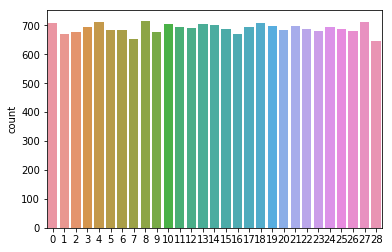

TestData


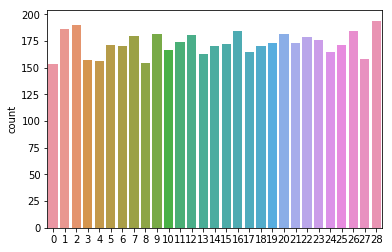

ValidData


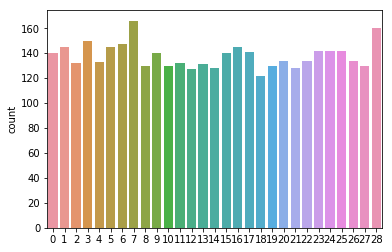

In [7]:
# labtrain = train_labels["lebelN"]
# labtest=test_labels["lebelN"]
# labValid=validData['lebelN']
# dist = lab1.value_counts()
print('TrainData')
sns.countplot(train_labels)
plt.show()
print('TestData')
sns.countplot(test_labels)
plt.show()
print('ValidData')
sns.countplot(valid_labels)

# %matplotlib inline
plt.show()
# %matplotlib inline

## visualize random 15 images

/home/workspace/dog-project/data/Q/Q1654.jpg .......   label :  Q  equal :  16


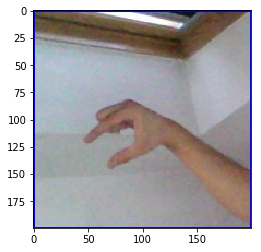

/home/workspace/dog-project/data/T/T357.jpg .......   label :  T  equal :  19


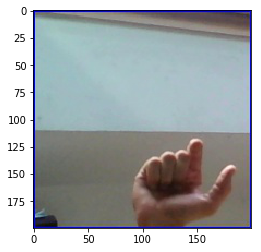

/home/workspace/dog-project/data/M/M111.jpg .......   label :  M  equal :  12


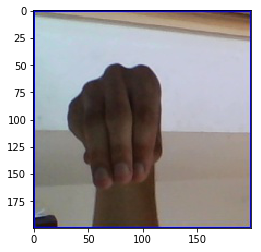

/home/workspace/dog-project/data/R/R1353.jpg .......   label :  R  equal :  17


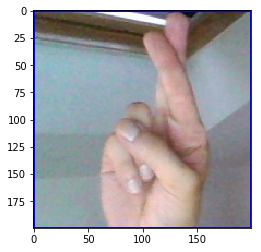

/home/workspace/dog-project/data/B/B631.jpg .......   label :  B  equal :  1


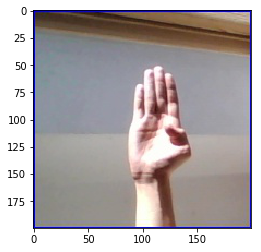

/home/workspace/dog-project/data/O/O2199.jpg .......   label :  O  equal :  14


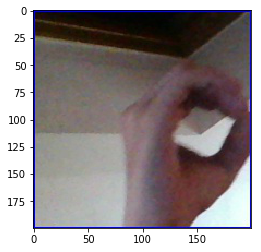

/home/workspace/dog-project/data/W/W1618.jpg .......   label :  W  equal :  22


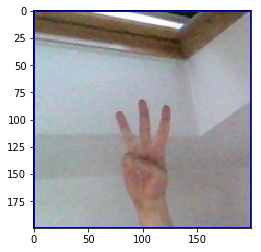

/home/workspace/dog-project/data/T/T2363.jpg .......   label :  T  equal :  19


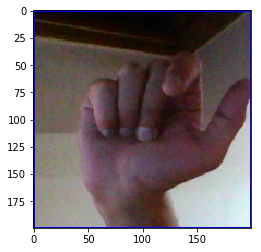

/home/workspace/dog-project/data/E/E2344.jpg .......   label :  E  equal :  4


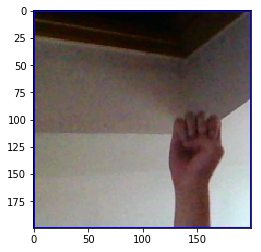

/home/workspace/dog-project/data/P/P406.jpg .......   label :  P  equal :  15


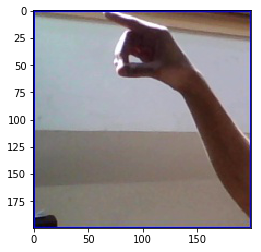

/home/workspace/dog-project/data/L/L1775.jpg .......   label :  L  equal :  11


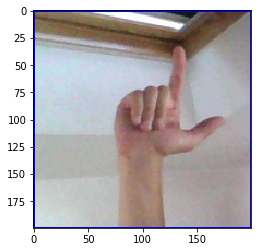

/home/workspace/dog-project/data/I/I1652.jpg .......   label :  I  equal :  8


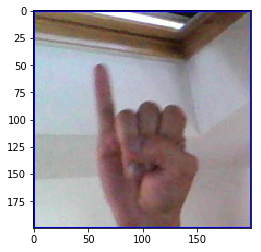

/home/workspace/dog-project/data/space/space1429.jpg .......   label :  space  equal :  28


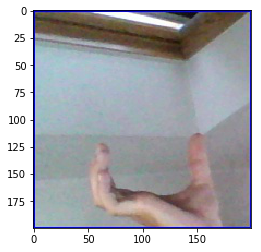

/home/workspace/dog-project/data/L/L2126.jpg .......   label :  L  equal :  11


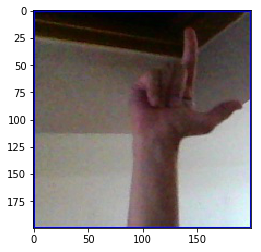

/home/workspace/dog-project/data/T/T1872.jpg .......   label :  T  equal :  19


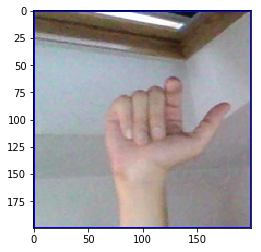

In [8]:
list = random.sample(range(29000), 15)
for i in list:
    print(data_df['Path'][i] ,".......   label : ",data_df['label'][i],' equal : ',data_df['lebelN'][i])
    plt.imshow(mpimg.imread(data_df['Path'][i]))
    plt.show()

# Data Preprocessing 

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape
                                                   (nb_samples,rows,columns,channels),
                                                   
where nb_samples corresponds to the total number of images (or samples), and rows, columns, and channels correspond to the number of rows, columns, and channels for each image, respectively.

The path_to_tensor function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN. The function first loads the image and resizes it to a square image that is  224×224  pixels. Next, the image is converted to an array, which is then resized to a 4D tensor. In this case, since we are working with color images, each image has three channels. Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

(1,224,224,3).
 
The paths_to_tensor function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape

(nb_samples,224,224,3).
 
Here, nb_samples is the number of samples, or number of images, in the supplied array of image paths. It is best to think of nb_samples as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [9]:
from keras.preprocessing import image
from tqdm import tqdm

def path_imgto_tensor(img_path):
    img=image.load_img(img_path,target_size=(50,50))
    x=image.img_to_array(img)
    return np.expand_dims(x,axis=0)


def paths_imgto_tensor(img_paths):
    list_of_tensors=[path_imgto_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)


## Pre-process the Data
I rescale the images by dividing every pixel in every image by 255

In [10]:
from PIL import ImageFile
import random
# random.seed(8675309)
ImageFile.LOAD_TRUNCATED_IMAGES=True


valid_tensors=paths_imgto_tensor(valid_targets).astype('float32')/255
test_tensors=paths_imgto_tensor(test_targets).astype('float32')/255
train_tensors=paths_imgto_tensor(train_targets).astype('float32')/255



100%|██████████| 20000/20000 [00:26<00:00, 764.35it/s]


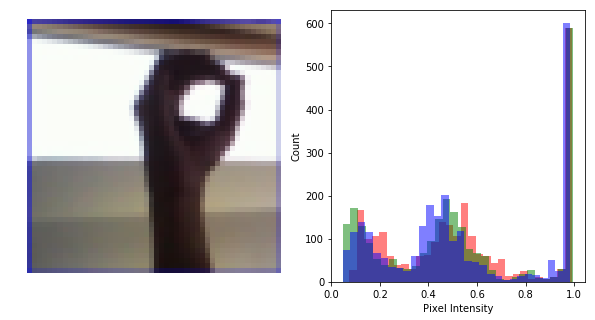

In [73]:
# plt.figure(figsize=(5,5))
# plt.imshow(train_tensors[0])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(train_tensors[0])
plt.axis('off')
histo = plt.subplot(1,2,2)
histo.set_ylabel('Count')
histo.set_xlabel('Pixel Intensity')
n_bins = 30
plt.hist(train_tensors[0][:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
plt.hist(train_tensors[0][:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
plt.hist(train_tensors[0][:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

In [13]:
# Empty dictionary to save accuracy values
accuracy_values={}

# Implementation

# MLP  Model 

# Define the Model Architecture 


In [24]:
from keras.layers import Conv2D ,MaxPooling2D ,GlobalAveragePooling2D
from keras.layers import Dropout ,Flatten ,Dense
from keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=(50,50,3)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(29, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 7500)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               1920256   
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
__________

# compile the Model

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# train the model

In [26]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 20

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.MLP.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_labelsHot, validation_data=(valid_tensors, valid_labelsHot), epochs=epochs,callbacks=[checkpointer],
          batch_size=20)

Train on 20000 samples, validate on 4000 samples
Epoch 1/20
20000/20000 [==============================] - 9s 427us/step - loss: 3.4671 - acc: 0.0334 - val_loss: 3.3682 - val_acc: 0.0325
Epoch 2/20
20000/20000 [==============================] - 8s 416us/step - loss: 3.3686 - acc: 0.0340 - val_loss: 3.3686 - val_acc: 0.0325
Epoch 3/20
20000/20000 [==============================] - 8s 416us/step - loss: 3.3677 - acc: 0.0342 - val_loss: 3.3684 - val_acc: 0.0325
Epoch 4/20
20000/20000 [==============================] - 8s 400us/step - loss: 3.3681 - acc: 0.0349 - val_loss: 3.3686 - val_acc: 0.0325
Epoch 5/20
20000/20000 [==============================] - 8s 398us/step - loss: 3.3676 - acc: 0.0339 - val_loss: 3.3690 - val_acc: 0.0325
Epoch 6/20
20000/20000 [==============================] - 8s 397us/step - loss: 3.3676 - acc: 0.0325 - val_loss: 3.3689 - val_acc: 0.0325
Epoch 7/20
20000/20000 [==============================] - 8s 396us/step - loss: 3.3676 - acc: 0.0337 - val_loss: 3.3687 - v

# load the model with the best classification Accuracy on the validation set

In [27]:
model.load_weights('saved_models/weights.best.MLP.hdf5')

# Calculate the classification on the test set

In [28]:
score=model.evaluate(test_tensors,test_labelsHot,verbose=0)
accuracy=100*score[1]
accuracy_values['MLP']=accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 3.0800%


# CNN Model 

# Define the model Architecture

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

# define the model
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(50, 50, 3)))
cnn_model.add(MaxPooling2D(pool_size=2))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Dropout(0.5))
cnn_model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=2))
# cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dropout(0.2))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Dense(256, activation='relu'))
# cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(29, activation='softmax')) 

cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 6, 64)          0         
__________

# Compile the Model

In [30]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model

In [15]:
from keras.callbacks import ModelCheckpoint 
epochs = 5

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.CNN.hdf5', 
                               verbose=1, save_best_only=True)

cnn_model.fit(train_tensors, train_labelsHot, validation_data=(valid_tensors, valid_labelsHot), epochs=epochs,callbacks=[checkpointer],
          batch_size=20, verbose=1)

Train on 20000 samples, validate on 4000 samples
Epoch 1/5
20000/20000 [==============================] - 17s 836us/step - loss: 1.7630 - acc: 0.4584 - val_loss: 0.6744 - val_acc: 0.7830
Epoch 2/5
20000/20000 [==============================] - 13s 636us/step - loss: 0.6257 - acc: 0.7936 - val_loss: 0.3301 - val_acc: 0.9020
Epoch 3/5
20000/20000 [==============================] - 13s 636us/step - loss: 0.3506 - acc: 0.8825 - val_loss: 0.1808 - val_acc: 0.9437
Epoch 4/5
20000/20000 [==============================] - 13s 636us/step - loss: 0.2532 - acc: 0.9133 - val_loss: 0.1314 - val_acc: 0.9580
Epoch 5/5
20000/20000 [==============================] - 13s 632us/step - loss: 0.1963 - acc: 0.9350 - val_loss: 0.1362 - val_acc: 0.9597


# Load the Model with the Best classification Accuracy on the Validation set

In [31]:
cnn_model.load_weights('saved_models/weights.best.CNN.hdf5')

# Calculate the classification Accuracy on the test set

In [32]:
score = cnn_model.evaluate(test_tensors, test_labelsHot, verbose=0)
accuracy = 100*score[1]
accuracy_values['CNN'] = accuracy
# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 96.4000%


# CNN with Augment training Data

## Define the model architecture ##

In [33]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import BatchNormalization
# from keras.layers import Conv2D, MaxPooling1D

# # define the model
cnn_model_agu = Sequential()
cnn_model_agu.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(50, 50, 3)))
cnn_model_agu.add(MaxPooling2D(pool_size=2))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Dropout(0.5))
cnn_model_agu.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
cnn_model_agu.add(MaxPooling2D(pool_size=2))
# cnn_model.add(BatchNormalization())
cnn_model_agu.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
cnn_model_agu.add(MaxPooling2D(pool_size=2))
cnn_model_agu.add(Dropout(0.3))
cnn_model_agu.add(Flatten())
cnn_model_agu.add(Dense(500, activation='relu'))
cnn_model_agu.add(Dropout(0.2))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Dense(256, activation='relu'))
# cnn_model.add(Dropout(0.4))
cnn_model_agu.add(Dense(29, activation='softmax')) 

cnn_model_agu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 50, 128)       1664      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)        32832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 256)       65792     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 6, 6, 256)         0         
__________

## Compile the model ##

In [34]:
cnn_model_agu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Augment the training and validation data

In [35]:
from keras.preprocessing.image import ImageDataGenerator
data_gen=ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

data_gen.fit(train_tensors)
data_gen.fit(valid_tensors)

## Train the Model

In [36]:
from keras.callbacks import ModelCheckpoint 
# epochs = 5

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.CNN_Aug.hdf5', 
                               verbose=1, save_best_only=True)

cnn_model_agu.fit_generator(data_gen.flow(train_tensors, train_labelsHot, batch_size=32),validation_data=(data_gen.flow(valid_tensors, valid_labelsHot))
                    ,validation_steps=100,steps_per_epoch=len(train_tensors) / 32, epochs=5,callbacks=[checkpointer])




Epoch 1/5
625/625 [==============================] - 22s 35ms/step - loss: 2.6440 - acc: 0.2220 - val_loss: 1.6409 - val_acc: 0.4822
Epoch 2/5
625/625 [==============================] - 22s 35ms/step - loss: 1.3190 - acc: 0.5745 - val_loss: 0.8872 - val_acc: 0.7234
Epoch 3/5
625/625 [==============================] - 22s 35ms/step - loss: 0.8783 - acc: 0.7051 - val_loss: 0.6168 - val_acc: 0.7931
Epoch 4/5
625/625 [==============================] - 22s 34ms/step - loss: 0.6542 - acc: 0.7812 - val_loss: 0.4936 - val_acc: 0.8356
Epoch 5/5
625/625 [==============================] - 22s 35ms/step - loss: 0.5381 - acc: 0.8162 - val_loss: 0.4111 - val_acc: 0.8559


## load the model with the Best Classification Accuracy on the validation set 

In [37]:
cnn_model_agu.load_weights('saved_models/weights.best.CNN_Aug.hdf5')


## Calculate the classification Accuracy on the test set

In [38]:
score = cnn_model_agu.evaluate(test_tensors, test_labelsHot, verbose=0)
accuracy = 100*score[1]
accuracy_values['CNN_Aug'] = accuracy
# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 91.0400%


# SVM Model

## Reshape images data from 4D array to 2D array

In [10]:
train_tensors.shape=(len(train_tensors),7500)
test_tensors.shape=(len(test_tensors),7500)

## SVM Classifiar 

In [13]:
from sklearn.svm import SVC
model_svm=SVC(C=1000.0,  degree=3, gamma=0.01, kernel='rbf', random_state=42)
model_svm.fit(train_tensors,train_labels)
prediction=model_svm.predict(test_tensors)


## Calculate the Classification Accuracy on the test Set

In [16]:
from sklearn.metrics import accuracy_score ,precision_score,recall_score
print('Accuracy score: ', format((accuracy_score(prediction, test_labels))*100))
accuracy_values['SVM']=accuracy_score(prediction, test_labels))*100

Accuracy score:  97.36


In [41]:
accuracy_values['SVM']=97.36

# model Evaluation
## based on CNN and CNN_Aug models 

In [42]:
def cnn_predict(img_path):
#     predict_vec=cnn_model.predict(path_imgto_tensor(img_path))
    #print(predict_vec)
    predict_vec=cnn_model.predict(path_imgto_tensor(img_path))
    return alphabet[np.argmax(predict_vec)]
    

In [43]:
def cnn_Aug_predict(img_path):
#     predict_vec=cnn_model.predict(path_imgto_tensor(img_path))
    #print(predict_vec)
    predict_vec=cnn_model_agu.predict(path_imgto_tensor(img_path))
    return alphabet[np.argmax(predict_vec)]

In [44]:
def ASL_detect(img_path):
    plt.imshow(plt.imread(img_path))
    plt.show()
    print('that sing mean .....')
    
    print('using CNN .............' ,cnn_predict(img_path))
    print('using CNN Augmented....',cnn_Aug_predict(img_path))
    

/home/workspace/dog-project/test_image/H_test.jpg


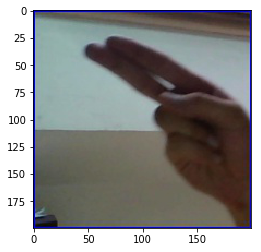

that sing mean .....
using CNN ............. H
using CNN Augmented.... P
/home/workspace/dog-project/test_image/W_test.jpg


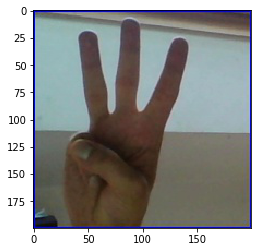

that sing mean .....
using CNN ............. W
using CNN Augmented.... W
/home/workspace/dog-project/test_image/C_test.jpg


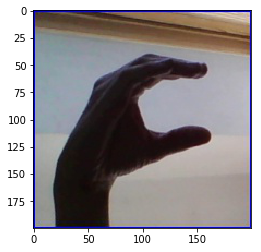

that sing mean .....
using CNN ............. C
using CNN Augmented.... C
/home/workspace/dog-project/test_image/B_test.jpg


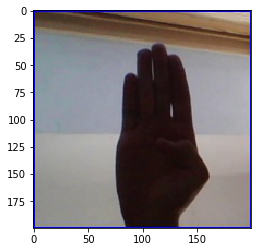

that sing mean .....
using CNN ............. B
using CNN Augmented.... B
/home/workspace/dog-project/test_image/space_test.jpg


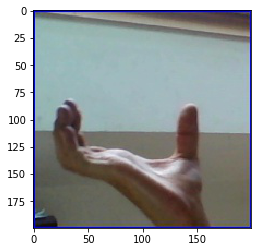

that sing mean .....
using CNN ............. space
using CNN Augmented.... space
/home/workspace/dog-project/test_image/P_test.jpg


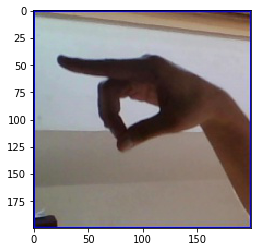

that sing mean .....
using CNN ............. P
using CNN Augmented.... P
/home/workspace/dog-project/test_image/S_test.jpg


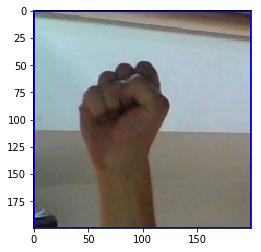

that sing mean .....
using CNN ............. S
using CNN Augmented.... N
/home/workspace/dog-project/test_image/nothing_test.jpg


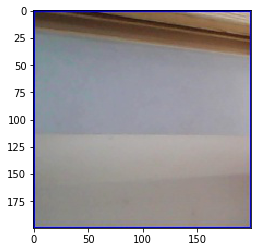

that sing mean .....
using CNN ............. nothing
using CNN Augmented.... N
/home/workspace/dog-project/test_image/U_test.jpg


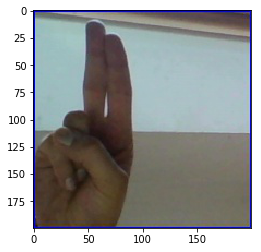

that sing mean .....
using CNN ............. U
using CNN Augmented.... B
/home/workspace/dog-project/test_image/Y_test.jpg


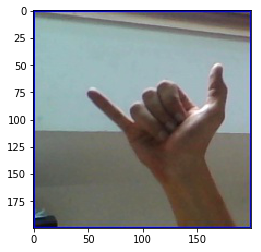

that sing mean .....
using CNN ............. Y
using CNN Augmented.... Y
/home/workspace/dog-project/test_image/T_test.jpg


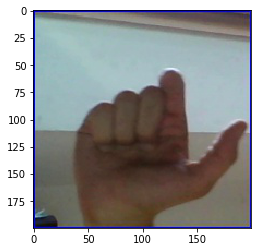

that sing mean .....
using CNN ............. T
using CNN Augmented.... L
/home/workspace/dog-project/test_image/D_test.jpg


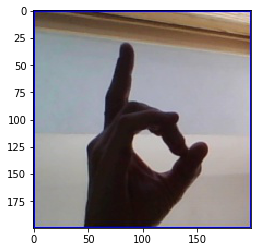

that sing mean .....
using CNN ............. D
using CNN Augmented.... D
/home/workspace/dog-project/test_image/R_test.jpg


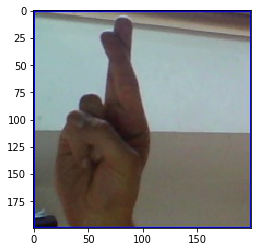

that sing mean .....
using CNN ............. R
using CNN Augmented.... L
/home/workspace/dog-project/test_image/L_test.jpg


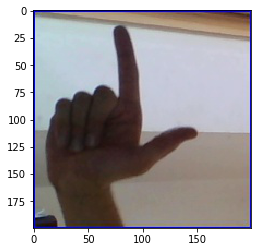

that sing mean .....
using CNN ............. L
using CNN Augmented.... L
/home/workspace/dog-project/test_image/F_test.jpg


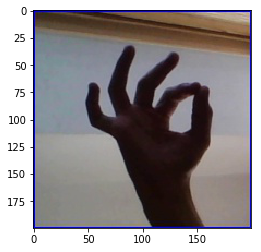

that sing mean .....
using CNN ............. F
using CNN Augmented.... F
/home/workspace/dog-project/test_image/K_test.jpg


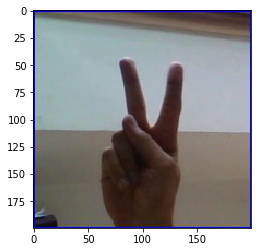

that sing mean .....
using CNN ............. K
using CNN Augmented.... W
/home/workspace/dog-project/test_image/I_test.jpg


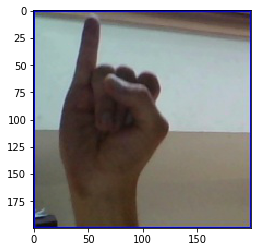

that sing mean .....
using CNN ............. I
using CNN Augmented.... D
/home/workspace/dog-project/test_image/A_test.jpg


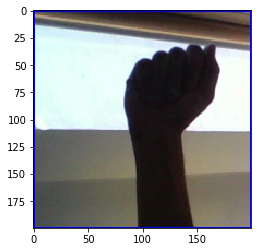

that sing mean .....
using CNN ............. T
using CNN Augmented.... F
/home/workspace/dog-project/test_image/Z_test.jpg


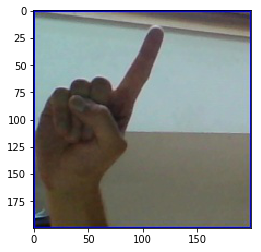

that sing mean .....
using CNN ............. Z
using CNN Augmented.... L
/home/workspace/dog-project/test_image/O_test.jpg


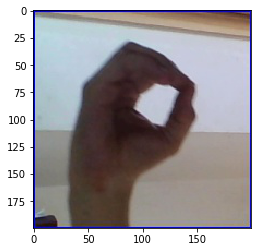

that sing mean .....
using CNN ............. O
using CNN Augmented.... D
/home/workspace/dog-project/test_image/N_test.jpg


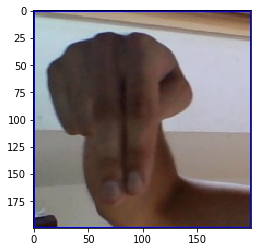

that sing mean .....
using CNN ............. N
using CNN Augmented.... N
/home/workspace/dog-project/test_image/J_test.jpg


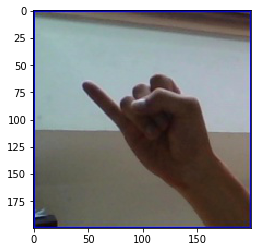

that sing mean .....
using CNN ............. J
using CNN Augmented.... J
/home/workspace/dog-project/test_image/Q_test.jpg


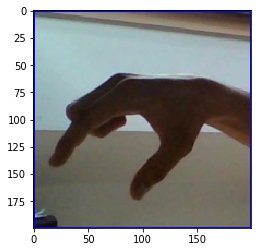

that sing mean .....
using CNN ............. Q
using CNN Augmented.... Q
/home/workspace/dog-project/test_image/E_test.jpg


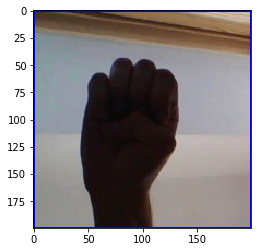

that sing mean .....
using CNN ............. E
using CNN Augmented.... E
/home/workspace/dog-project/test_image/M_test.jpg


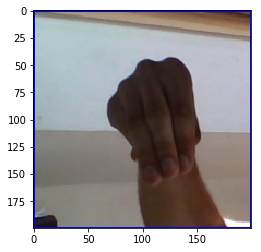

that sing mean .....
using CNN ............. M
using CNN Augmented.... N
/home/workspace/dog-project/test_image/G_test.jpg


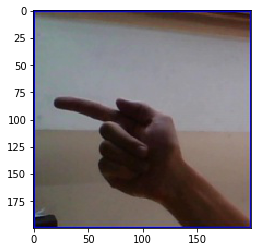

that sing mean .....
using CNN ............. G
using CNN Augmented.... P
/home/workspace/dog-project/test_image/X_test.jpg


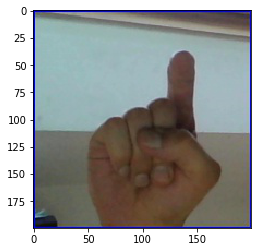

that sing mean .....
using CNN ............. X
using CNN Augmented.... L
/home/workspace/dog-project/test_image/V_test.jpg


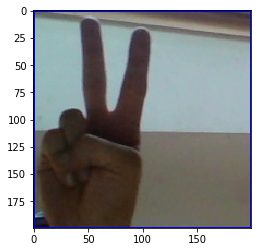

that sing mean .....
using CNN ............. V
using CNN Augmented.... W


In [45]:
my_file=np.array(glob("/home/workspace/dog-project/test_image/*"))

for i in my_file:
    print(i)
    ASL_detect(i)

# Results

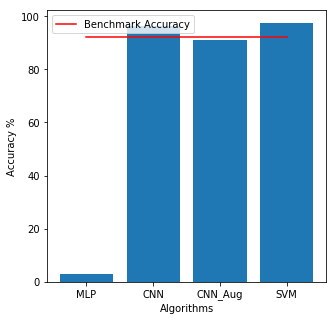

In [68]:
plt.figure(figsize=(5, 5))
x = [i for i in range(4)]
y = np.ones(4)*92   
plt.plot(x, y, color='r', label="Benchmark Accuracy")
plt.legend()
plt.bar(x, accuracy_values.values())
plt.xticks(x, accuracy_values.keys())
plt.xlabel('Algorithms')
plt.ylabel('Accuracy %')
plt.show()

# Conclusion
* The Deep Learning Convolution Neural Networks are very promised in Computer Vision.Also Support Vector Machines algorithm can used in this fields as a cheaper solution with reasonable accuracy.
* The CNN model can be improved using the power of GPUs by using augmentation, randomization and transfer learning